Random Forest Results:
  RMSE: 9497.46
  R^2 Score: 0.7758

Gradient Boosting Results:
  RMSE: 9754.02
  R^2 Score: 0.7635

Linear Regression Results:
  RMSE: 9161.80
  R^2 Score: 0.7913

Voting Ensemble Results:
  RMSE: 9089.44
  R^2 Score: 0.7946



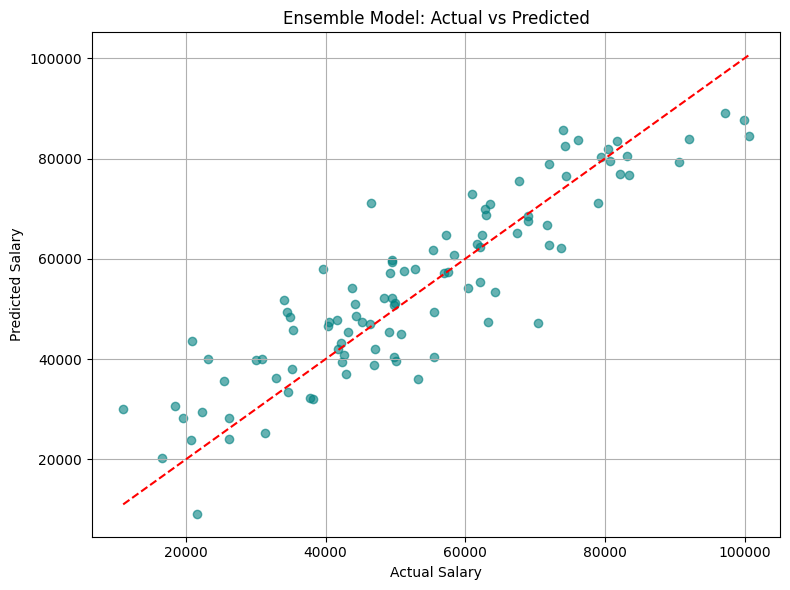

In [3]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

total_entries = 500

df = pd.DataFrame({
    'experience_yrs': np.random.randint(0, 20, size=total_entries),
    'edu_level': np.random.choice([1, 2, 3], size=total_entries),
    'age': np.random.randint(22, 60, size=total_entries),
    'industry_noise': np.random.rand(total_entries)
})

df['salary'] = (
    df['experience_yrs'] * 2500 +               # more experience = more $
    df['edu_level'] * 8000 +                    # higher edu = more $
    df['age'] * 300 +                           # older tends to earn more
    df['industry_noise'] * 10000 +              # some fuzzy industry factor
    np.random.normal(0, 10000, size=total_entries)
)

features = df.drop(columns=['salary'])
target = df['salary']

X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42
)

forest = RandomForestRegressor(n_estimators=100, random_state=42)
boost = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
linear = LinearRegression()

ensemble = VotingRegressor([
    ('rf', forest),
    ('gb', boost),
    ('lr', linear)
])

regressors = {
    "Random Forest": forest,
    "Gradient Boosting": boost,
    "Linear Regression": linear,
    "Voting Ensemble": ensemble
}

for label, algo in regressors.items():
    algo.fit(X_train, y_train)
    preds = algo.predict(X_test)

    rmse_val = np.sqrt(mean_squared_error(y_test, preds))
    r2_val = r2_score(y_test, preds)

    print(f"{label} Results:")
    print(f"  RMSE: {rmse_val:.2f}")
    print(f"  R^2 Score: {r2_val:.4f}")
    print()

plt.figure(figsize=(8, 6))
plt.scatter(y_test, ensemble.predict(X_test), alpha=0.6, c='teal')
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    linestyle='--',
    color='red'
)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Ensemble Model: Actual vs Predicted")

plt.grid(True)
plt.tight_layout()
plt.show()


